# Linear assignment problem

The [linear assignment problem](https://en.wikipedia.org/wiki/Linear_assignment_problem) is a fundamental problem in combinatorial optimization.

In this problem, we are given an $n \times m$ cost matrix.
The goal is to compute an assignment, i.e. a set of pairs of rows and columns, in such a way that:
- At most one column is assigned to each row.
- At most one row is assigned to each column.
- The total number of assignments is $\min(n, m)$.
- The assignment minimizes the sum of costs.

Equivalently, given a weighted complete bipartite graph, the problem is to find a maximum-cardinality matching that minimizes the sum of the weights of the edges included in the matching.

Formally, the problem is as follows. Given $C \in \mathbb{R}^{n \times m}$, solve the following [integer linear program](https://en.wikipedia.org/wiki/Integer_linear_program):

$$
\begin{align*}
    \text{minimize} \quad & \sum_{i \in [n]} \sum_{j \in [m]} C_{ij} X_{ij} \\
    \text{subject to} \quad
    & X_{ij} \in \{0, 1\} & \forall i \in [n], j \in [m] \\
    & \sum_{i \in [n]} X_{ij} \leq 1 & \forall j \in [m] \\
    & \sum_{j \in [m]} X_{ij} \leq 1 & \forall i \in [n] \\
    & \sum_{i \in [n]} \sum_{j \in [m]} X_{ij} = \min(n, m)
\end{align*}
$$

The [Hungarian algorithm](https://en.wikipedia.org/wiki/Hungarian_algorithm) is a cubic-time algorithm for this problem.

First, we install [NetworkX](https://networkx.org/), a Python library that lets us draw graphs.
You can do this by running the following command on your terminal:
```
pip install -U networkx
```
Next, we import the libraries we will use:

In [1]:
import networkx as nx
from jax import numpy as jnp, random
import optax
from matplotlib import pyplot as plt

We sample a random cost matrix:

In [2]:
n = 5  # number of rows
m = 3  # number of columns

key = random.key(0)
costs = random.normal(key, (n, m))
print(costs)

[[ 0.08482574  1.9097648   0.29561743]
 [ 1.120948    0.33432344 -0.82606775]
 [ 0.6481277  -1.0353061  -0.7824839 ]
 [-0.4539462   0.6297971   0.81524646]
 [-0.32787678 -1.1234448  -1.6607416 ]]


We can visualize the cost matrix as follows:

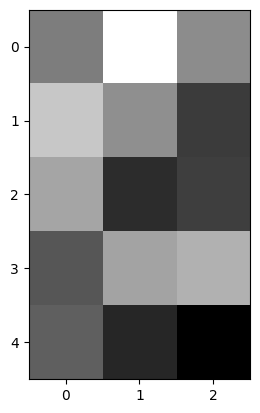

In [3]:
plt.imshow(costs, cmap="gray");

We can also visualize the costs as a weighted bipartite graph. Below, rows are shown as nodes the left and columns are shown as nodes the right.

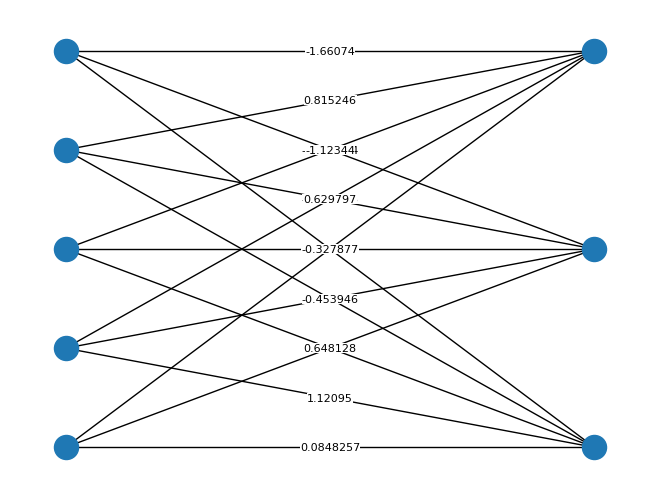

In [4]:
G = nx.Graph()
rows = [f"row {i}" for i in range(n)]
cols = [f"col {j}" for j in range(m)]
edges = [(rows[i], cols[j], {"cost": costs[i, j]}) for i in range(n) for j in range(m)]
G.add_nodes_from(rows + cols)
G.add_edges_from(edges)
layout = nx.bipartite_layout(G, rows)
nx.draw(G, layout)
nx.draw_networkx_edge_labels(
    G,
    layout,
    edge_labels={(u, v): f"{info["cost"]:g}" for u, v, info in edges},
    rotate=False,
    font_size=8,
    bbox=dict(
        pad=0.0,
        facecolor="white",
        edgecolor="none",
    ),
);

To solve the problem, we call {py:func}`optax.assignment.hungarian_algorithm` on the cost matrix.

In [5]:
sol_i, sol_j = optax.assignment.hungarian_algorithm(costs)
print(sol_i, sol_j)

[2 3 4] [1 0 2]


We can visualize the solution as follows:

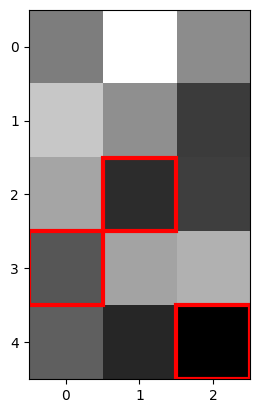

In [6]:
def highlight_cell(x, y, **kwargs):
    rect = plt.Rectangle((x - 0.5, y - 0.5), 1, 1, fill=False, **kwargs)
    plt.gca().add_patch(rect)
    return rect

plt.imshow(costs, cmap="gray")

for i, j in zip(sol_i, sol_j):
    highlight_cell(j, i, color="red", linewidth=3)

plt.show()

We can also visualize the solution by drawing it on top of the previous bipartite graph. Below, nodes and edges that are included in the solution are shown in red.

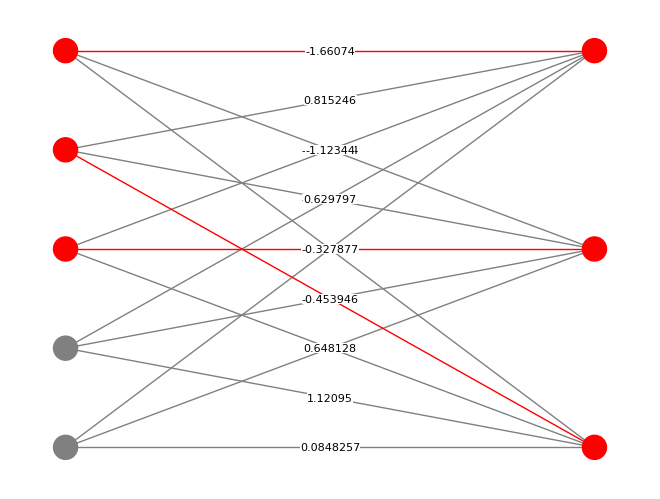

In [7]:
nx.draw(
    G,
    layout,
    node_color=["red" if i in sol_i else "grey" for i in range(n)] + ["red" if j in sol_j else "grey" for j in range(m)],
    edge_color=["red" if (i, j) in zip(sol_i, sol_j) else "grey" for i in range(n) for j in range(m)],
)
nx.draw_networkx_edge_labels(
    G,
    layout,
    edge_labels={(u, v): f"{info["cost"]:g}" for u, v, info in edges},
    rotate=False,
    font_size=8,
    bbox=dict(
        pad=0.0,
        facecolor="white",
        edgecolor="none",
    ),
);